In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
def f(x,t):
    return np.exp(x) - x*np.exp(t)

In [3]:
def Increment(f,x,t,h):
    
    k1 = f(x,t)
    k2 = f(x+ 0.5*h*k1,t+ 0.5*h)
    k3 = f(x+ 0.5*h*k2,t+ 0.5*h)
    k4 = f(x+ h*k3,t+h)
    
    New_x = x + h*(k1+2*k2+2*k3+k4)/6.
    
    return New_x

In [4]:
def CheckStep(step,halfstep,doublestep,h,dxmin=0.005,dxmax = 0.01):
    
    dt_min = 1e-3
    
    if np.abs(step) < dt_min:
        h = dt_min
        dx = step
        
    else:
        
        if np.abs(step) > dt_min and np.abs( step - halfstep ) / np.abs( step ) > dxmax:
            h = 0.5*h
            dx = halfstep 
            
        elif np.abs(step) > dt_min and np.abs( step - doublestep ) / np.abs( step ) < dxmin:
            
            h = 2*h
            dx = doublestep
        else:
            dx = step
            
    return dx,h

In [5]:
t0 = 0
x0 = 0.02

def GetAdapRK4(t0,x0,h=0.02,tmax=5):
    
    t = t0
    x = x0
    
    Time = np.array([])
    Position = np.array([])
    Steps = np.array([])
    
    while t < tmax:
        
        Steps = np.append(Steps,h)
        
        step = Increment(f,x,t,h)
        halfstep = Increment(f,x,t,0.5*h)
        doublestep = Increment(f,x,t,2.0*h)
        
        dx, h = CheckStep(step,halfstep,doublestep,h)
        
        x = dx
        t += h
        
        Time = np.append(Time,t)
        Position = np.append(Position,x)
        
    return Time,Position,Steps       

In [6]:
_t,_x,_h = GetAdapRK4(t0,x0)

In [11]:
#print(_t)

<IPython.core.display.Javascript object>


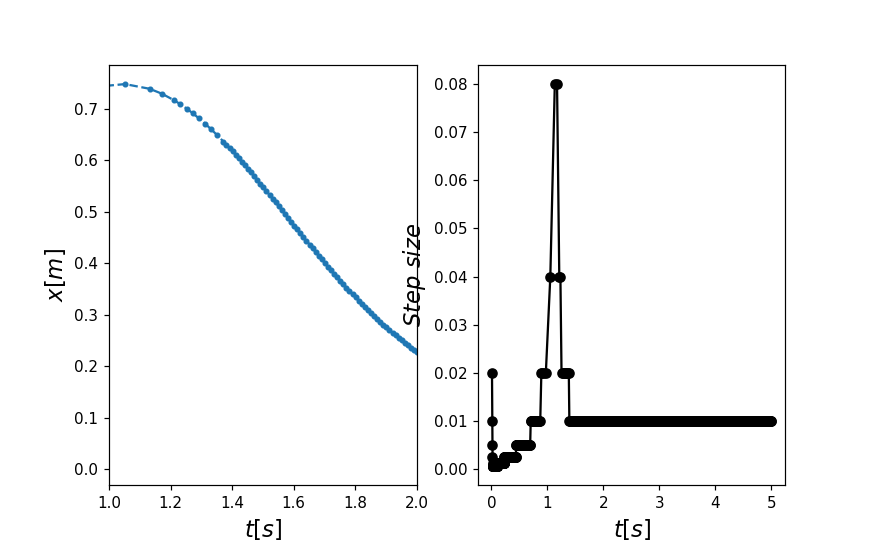

In [10]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

ax.plot(_t,_x,'--',marker='.')
ax.set_xlabel(r'$t[s]$',fontsize=15)
ax.set_ylabel(r'$x[m]$',fontsize=15)
ax.set_xlim(1,2)

ax1.plot(_t,_h,color='k',marker='o')
ax1.set_xlabel(r'$t[s]$',fontsize=15)
ax1.set_ylabel(r'$Step \ size$',fontsize=15)

plt.show()